In [22]:
import glob
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd

# Load the contents
with open("train_metrics_20250706_1423.jsonl", "r") as f:
    train_metrics = [json.loads(line) for line in f]

In [23]:
df_metrics = pd.DataFrame(train_metrics)
df_metrics

,step,loss,norm,tokens_per_second,lr,shard_index
0,0,7.672285,0.793099,7239.418379,1.000000e-04,0
1,10,7.521187,0.790245,134094.633317,9.999999e-05,0
2,20,7.374413,0.657183,133960.011961,9.999996e-05,0
3,30,7.231866,0.674201,133564.903448,9.999991e-05,0
4,40,7.175562,0.953208,133804.684438,9.999983e-05,0
...,...,...,...,...,...,...
5216,52160,3.650433,1.272113,130593.130954,3.992333e-07,17
5217,52170,3.874938,1.413851,130481.175281,3.992223e-07,17
5218,52180,3.684617,1.252987,130460.491330,3.992112e-07,17
5219,52190,3.737688,1.367491,130278.335064,3.992000e-07,17


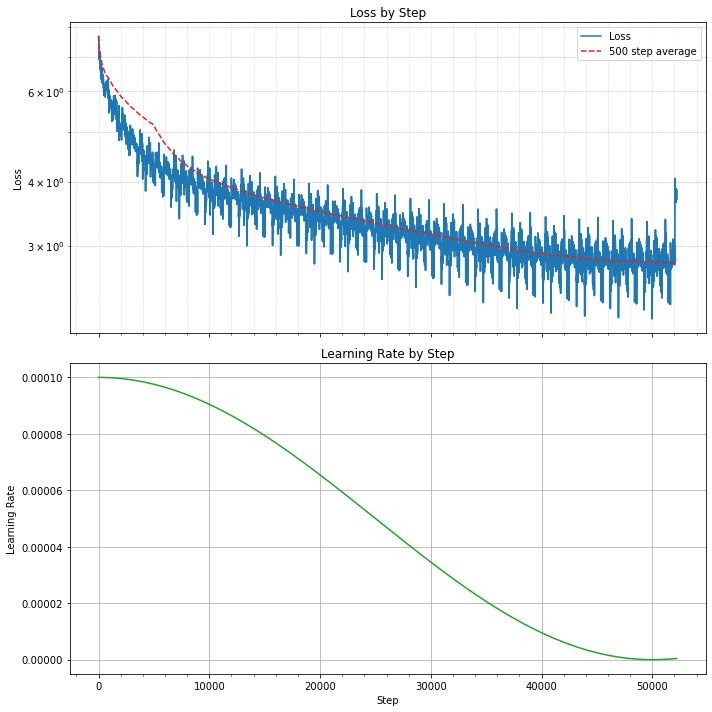

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Add a smoothed loss column using rolling mean
df_metrics['loss_smooth'] = df_metrics['loss'].rolling(window=500, min_periods=1).mean()

# Plot the smoothed loss line
# Plot the smoothed loss line above the loss
line_loss = ax1.plot(df_metrics['step'], df_metrics['loss'], color='tab:blue', label='Loss')
line_smooth = ax1.plot(df_metrics['step'], df_metrics['loss_smooth'], color='tab:red', linestyle='--', label='500 step average', zorder=3)
ax1.legend()
ax1.yaxis.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.xaxis.set_major_locator(mticker.AutoLocator())
ax1.xaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.xaxis.grid(True, which='both', linestyle=':', linewidth=0.5)
# ax1.set_ylim(0, 6)
ax1.set_yscale('log')  # Set y-axis to logarithmic scale for better visibility



# Plot Loss
ax1.plot(df_metrics['step'], df_metrics['loss'], color='tab:blue', label='Loss')
ax1.set_ylabel('Loss')
ax1.set_title('Loss by Step')
ax1.grid(True)

# Plot Learning Rate

ax2.plot(df_metrics['step'], df_metrics['lr'], color='tab:green')
ax2.set_xlabel('Step')
ax2.set_ylabel('Learning Rate')
ax2.set_title('Learning Rate by Step')
ax2.grid(True)
# ax2.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0e'))

plt.tight_layout()
plt.show()
